# DLthon - 길찾는 오리들
## Base Settings

In [1]:
# importing the libraries
import keras, tensorflow as tf
from keras import layers

# keras.mixed_precision.set_global_policy('mixed_float16')

# importing the modules
import models_base, models_top, utils

2025-01-22 22:15:05.105839: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-22 22:15:05.115398: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737551705.125719  539651 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737551705.128683  539651 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-22 22:15:05.142378: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
# loading the dataset
train_dataset, val_dataset, test_dataset = utils.load_unified_datasets("data/data_blue_sorted", val_split = 0.2,)

Found 374 files belonging to 6 classes.


Using 300 files for training.
Using 74 files for validation.


I0000 00:00:1737551706.778715  539651 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9571 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080, pci bus id: 0000:01:00.0, compute capability: 8.6


## Model Design

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ image_preprocessing_v1          │ (None, 224, 224, 3)    │             7 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-l (Functional)   │ (None, 7, 7, 1280)     │   117,746,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ basic_simple1 (Sequential)      │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,076,333 (450.43 MB)

 Trainable params: 329,478 (1.26 MB)

 Non-trainable params: 117,746,855 (449.17 MB)

Epoch 1/200


I0000 00:00:1737549189.750997  492446 cuda_dnn.cc:529] Loaded cuDNN version 90600


5/5 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step - accuracy: 0.1564 - loss: 1.8332 - val_accuracy: 0.3281 - val_loss: 1.7439
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 852ms/step - accuracy: 0.2301 - loss: 1.7467 - val_accuracy: 0.3281 - val_loss: 1.7215
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 893ms/step - accuracy: 0.3313 - loss: 1.6957 - val_accuracy: 0.3594 - val_loss: 1.7127
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 996ms/step - accuracy: 0.3271 - loss: 1.7033 - val_accuracy: 0.3750 - val_loss: 1.6943
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 489ms/step - accuracy: 0.3488 - loss: 1.6651 - val_accuracy: 0.3750 - val_loss: 1.6806
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 477ms/step - accuracy: 0.4086 - loss: 1.6379 - val_accuracy: 0.3750 - val_loss: 1.6647
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3944 - loss: 1.6327 - val_accuracy: 0.4062 - val_loss: 1.6447
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 476ms/step - accuracy: 0.4278 - loss: 1.6081 - val_accuracy: 0.3750 - val_loss: 1.6312
E

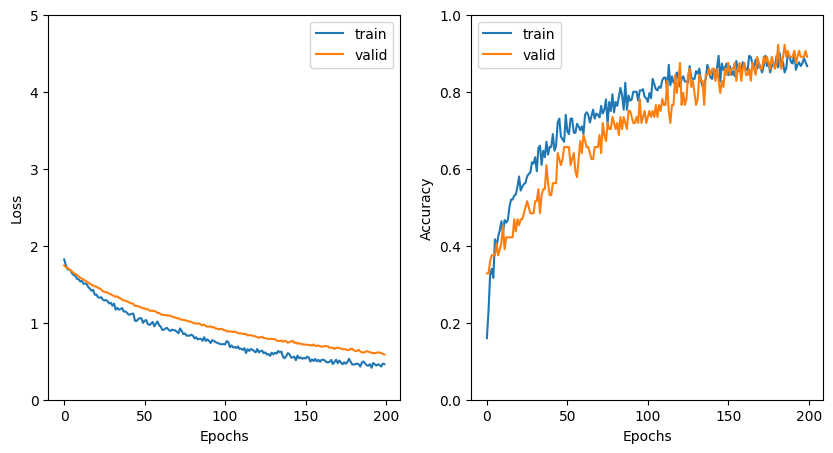

1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.8000 - loss: 0.5239
Test accuracy: 0.80%, Test loss: 0.52


In [3]:
# designing the model

def eV2L_simple1(): # this can be adjusted to be hyper-tunable
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v1()(inputs)
    x = models_base.EV2L((224, 224, 3))(x, training=False)
    x = models_top.simple1()(x)
    outputs = layers.Dense(6, activation='softmax', name="classifier")(x)

    model = keras.Model(inputs, outputs)
    
    model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
                   metrics=['accuracy'])
    
    return model

eV2L_simple1().summary()

eV2L_simple1_history = eV2L_simple1().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_simple1.keras'),
        utils.callback_earlystop(30)
    ],
)

utils.plot_history(eV2L_simple1_history)

test_loss, test_acc = keras.models.load_model('eV2L_simple1.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

In [11]:
test_loss, test_acc = keras.models.load_model('eV2L_simple1.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.9000 - loss: 0.3622
Test accuracy: 0.90%, Test loss: 0.36


Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ image_preprocessing_v1          │ (None, 224, 224, 3)    │             7 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-l (Functional)   │ (None, 7, 7, 1280)     │   117,746,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ basic_midsize1 (Sequential)     │ (None, 256)            │     1,049,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,798,253 (453.18 MB)

 Trainable params: 1,051,398 (4.01 MB)

 Non-trainable params: 117,746,855 (449.17 MB)

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.1903 - loss: 1.7959 - val_accuracy: 0.1875 - val_loss: 1.7663
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2712 - loss: 1.7536 

2025-01-22 21:02:42.783907: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 67110400 bytes after encountering the first element of size 67110400 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 14s 3s/step - accuracy: 0.2710 - loss: 1.7531 - val_accuracy: 0.3438 - val_loss: 1.7512
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 817ms/step - accuracy: 0.3448 - loss: 1.7175 - val_accuracy: 0.2969 - val_loss: 1.7392
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 637ms/step - accuracy: 0.3381 - loss: 1.6869 - val_accuracy: 0.3438 - val_loss: 1.7171
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 558ms/step - accuracy: 0.3676 - loss: 1.6763

2025-01-22 21:02:58.136680: W tensorflow/core/kernels/data/prefetch_autotuner.cc:52] Prefetch autotuner tried to allocate 67110400 bytes after encountering the first element of size 67110400 bytes.This already causes the autotune ram budget to be exceeded. To stay within the ram budget, either increase the ram budget or reduce element size


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3663 - loss: 1.6758 - val_accuracy: 0.3594 - val_loss: 1.6986
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4162 - loss: 1.6405 - val_accuracy: 0.3750 - val_loss: 1.6753
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.4281 - loss: 1.6385 - val_accuracy: 0.3594 - val_loss: 1.6577
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.4918 - loss: 1.5642 - val_accuracy: 0.3906 - val_loss: 1.6265
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4134 - loss: 1.6139 - val_accuracy: 0.4062 - val_loss: 1.6028
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 488ms/step - accuracy: 0.4634 - loss: 1.5579 - val_accuracy: 0.3906 - val_loss: 1.5774
Epoch 11/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 679ms/step - accuracy: 0.4973 - loss: 1.5109 - val_accuracy: 0.3750 - val_loss: 1.5422
Epoch 12/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 714ms/step - accuracy: 0.5024 - loss: 1.4532 - val_accuracy: 0.4062 - val_loss: 1.5136
Epoch 13

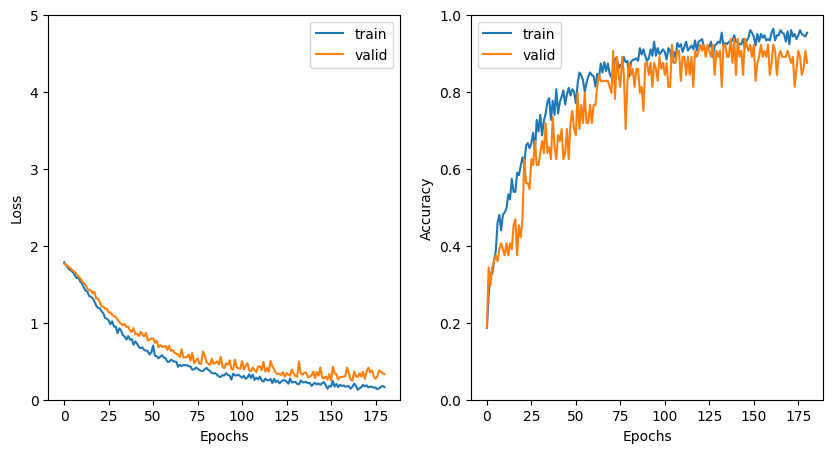

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 0.8000 - loss: 0.4869
Test accuracy: 0.80%, Test loss: 0.49


In [4]:
# designing the model

def eV2L_midsize1(): # this can be adjusted to be hyper-tunable
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v1()(inputs)
    x = models_base.EV2L((224, 224, 3))(x, training=False)
    x = models_top.midsize1()(x)
    outputs = layers.Dense(6, activation='softmax', name="classifier")(x)

    model = keras.Model(inputs, outputs)
    
    model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
                   metrics=['accuracy'])
    
    return model

eV2L_midsize1().summary()

eV2L_midsize1_history = eV2L_midsize1().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_midsize1.keras'),
        utils.callback_earlystop(30)
    ],
)

utils.plot_history(eV2L_midsize1_history)

test_loss, test_acc = keras.models.load_model('eV2L_midsize1.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

In [10]:
test_loss, test_acc = keras.models.load_model('eV2L_midsize1.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.8000 - loss: 0.4869
Test accuracy: 0.80%, Test loss: 0.49


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ image_preprocessing_v1          │ (None, 224, 224, 3)    │             7 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-l (Functional)   │ (None, 7, 7, 1280)     │   117,746,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ basic_midsize3 (Functional)     │ (None, 256)            │     4,595,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classifier (Dense)              │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,343,853 (466.70 MB)

 Trainable params: 4,595,462 (17.53 MB)

 Non-trainable params: 117,748,391 (449.17 MB)

Epoch 1/200


I0000 00:00:1737551743.404475  539776 cuda_dnn.cc:529] Loaded cuDNN version 90600


5/5 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.2466 - loss: 2.0905 - val_accuracy: 0.2031 - val_loss: 1.7762
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 480ms/step - accuracy: 0.4169 - loss: 1.5975 - val_accuracy: 0.1875 - val_loss: 1.7461
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 506ms/step - accuracy: 0.4511 - loss: 1.5092 - val_accuracy: 0.2031 - val_loss: 1.7222
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 828ms/step - accuracy: 0.5182 - loss: 1.2880 - val_accuracy: 0.2656 - val_loss: 1.6973
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 973ms/step - accuracy: 0.6270 - loss: 1.0665 - val_accuracy: 0.3438 - val_loss: 1.6776
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 897ms/step - accuracy: 0.6364 - loss: 1.0594 - val_accuracy: 0.3750 - val_loss: 1.6557
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 423ms/step - accuracy: 0.7030 - loss: 0.9098 - val_accuracy: 0.3750 - val_loss: 1.6338
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.7271 - loss: 0.8415 - val_accuracy: 0.4062 - val_loss: 1.6178
E

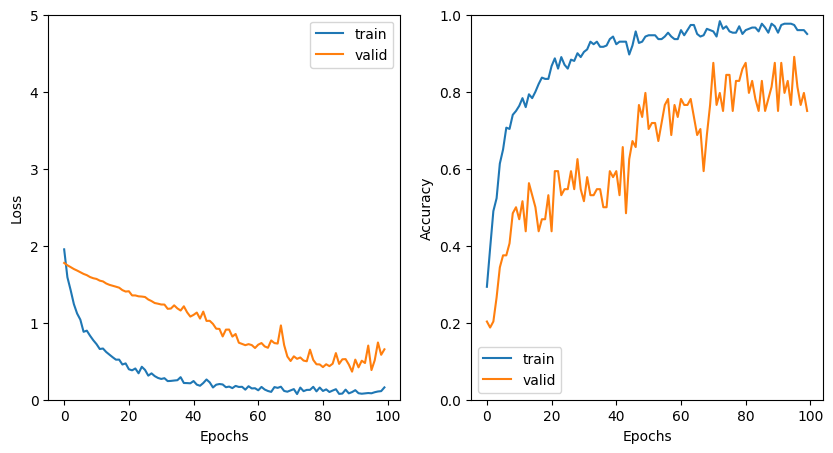

1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.7000 - loss: 0.5524
Test accuracy: 0.70%, Test loss: 0.55


In [3]:
# designing the model

def eV2L_midsize3(): # this can be adjusted to be hyper-tunable
    inputs = keras.Input(shape=(224, 224, 3))
    x = utils.image_preprocessing_v1()(inputs)
    x = models_base.EV2L((224, 224, 3))(x, training=False)
    x = models_top.midsize3()(x)
    outputs = layers.Dense(6, activation='softmax', name="classifier")(x)

    model = keras.Model(inputs, outputs)
    
    model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.RMSprop(learning_rate=1e-4),
                   metrics=['accuracy'])
    
    return model

eV2L_midsize3().summary()

eV2L_midsize3_history = eV2L_midsize3().fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=200,
    callbacks=[
        utils.callback_savemodel('eV2L_midsize3.keras'),
        utils.callback_earlystop(10)
    ],
)

utils.plot_history(eV2L_midsize3_history)

test_loss, test_acc = keras.models.load_model('eV2L_midsize3.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

In [4]:
test_loss, test_acc = keras.models.load_model('eV2L_midsize3.keras').evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.2f}%, Test loss: {test_loss:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.7000 - loss: 0.5524
Test accuracy: 0.70%, Test loss: 0.55
